# Лабораторная работа №5
# Решение интегральных уравнений Фредгольма

Необходимо решить интегральное уравнение Фредгольма <br>
$x(t) + \int^3_1\left(\frac{t}{s^2}-2\right)x(s)ds = t^2+\frac{t}{3}-\frac{1}{3} $ <br>
квадратурным методом с тремя и десятью узлами, пользуясь: <br>
$\bullet$формулой трапеций <br>
$\bullet$формулой Гаусса 

#### Используемые библиотеки

In [1]:
import matplotlib.pyplot as plt
from typing import Callable
import numpy as np
import math

 #### Условия

In [2]:
low_lim, up_lim = 1, 3


def K(t: float, s: float) -> float:
    return t / s**2 - 2


def func(t: float) -> float:
    return t**2 + t/3 - 1/3

#### Функция отрисовки

In [3]:
def draw(t: list, u: list):
    fig = plt.figure()
    plt.title('Fredholm solution')
    plt.ylabel('x(t)')
    plt.xlabel('t')
    l1 = plt.plot(t, u)
    fig.legend((l1), ('x'))
    plt.grid(True)
    plt.show()

### Метод трапеций
$\int^b_a f(x)dx = h\left(\frac{f_0 + f_n}{2}+\sum^{n-1}_{i = 1}f_i\right) $

In [4]:
def trapez_method(K: Callable, func: Callable, node: int) -> list and list:
    x = np.linspace(low_lim, up_lim, node)
    size = len(x)
    wt, wj = 0.5, 1
    h = (up_lim - low_lim) / (node - 1) 
    A = np.zeros((size, size))
    
    for i in range(0, size):
        A[i][0] = -h * wt * K(x[i], x[1])
        for j in range(2, size - 1):
            A[i][j] = -h * wj * K(x[i], x[j])
        A[i][size - 1] = -h * wt * K(x[i], x[size - 1])
        A[i][i] += 1
    
    B = np.zeros((size, 1))
    for j in range(0, size):
        B[j][0] = func(x[j])
    return np.linalg.solve(A, B), x

### Результаты

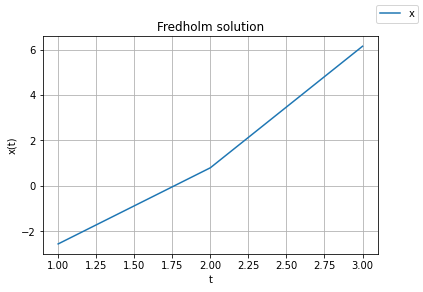

In [5]:
x, t = trapez_method(K=K, func=func, node=3) # для 3х узлов
draw(t, x)

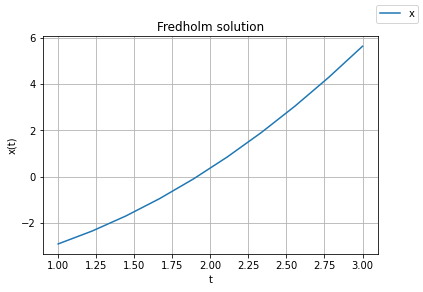

In [6]:
x, t = trapez_method(K=K, func=func, node=10) # для 10 узлов
draw(t, x)

### Формула Гаусса
$\int^b_a f(x)dx = \frac{b - a}{2}\sum^{n}_{i = 1}c_i f(s_i),$ <br>где
$s_i = \frac{a+b+(b-a)x_i}{2},$ <br>где $x_i -$ корни уравнения Лежандра

In [7]:
def gauss_3(K: Callable, func: Callable) -> list and list:
    x = np.linspace(low_lim, up_lim, 3)
    xt = [(low_lim + up_lim) / 2] * 3
    w = [- math.sqrt(3. / 5), 0, math.sqrt(3. / 5)]
    cj, ct = 5. / 9, 8. / 9
    h = (up_lim - low_lim) / 2 
    
    for i in range(3):
        xt[i] += w[i] * h
    
    size = len(xt)
    A = np.zeros((size, size))
    
    for i in range(0, size):
        A[i][0] = -h * cj * K(xt[i], xt[1])
        for j in range(2, size - 1):
            A[i][j] = -h * ct * K(xt[i], xt[j])
        A[i][size - 1] = -h * cj * K(xt[i], xt[size - 1])
        A[i][i] += 1
    
    B = np.zeros((size, 1))
    for j in range(0, size):
        B[j][0] = func(x[j])
    return np.linalg.solve(A, B), x


def gauss_10(K: Callable, func: Callable) -> list and list:
    x = np.linspace(low_lim, up_lim, 10)
    xt = [(low_lim + up_lim) / 2] * 10
    w = [
        -0.973906528517172,
        -0.865063366688985,
        -0.679409568299024,
        -0.433395394129244,
        -0.148874338981631,
        +0.148874338981631,
        +0.433395394129244,
        +0.679409568299024,
        +0.865063366688985,
        +0.973906528517172
    ]
    
    c = [
        0.066671344308688,
        0.149451349159581,
        0.219086362515982,
        0.269266719309996,
        0.295524224714753,
        0.295524224714753,
        0.269266719309996,
        0.219086362515982,
        0.149451349159581,
        0.066671344308688
    ]
    
    h = (up_lim - low_lim) / 9
    
    for i in range(10):
        xt[i] += w[i] * (up_lim - low_lim) / 2
    
    size = len(xt)
    A = np.zeros((size, size))
    
    for i in range(0, size):
        for j in range(0, size):
            A[i][j] = -(up_lim - low_lim) / 2 * c[j] * K(xt[i], xt[j])
        A[i][i] += 1
    
    B = np.zeros((size, 1))
    for j in range(0, size):
        B[j][0] = func(x[j])
    return np.linalg.solve(A, B), x

### Результаты

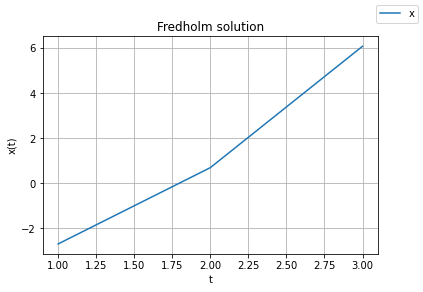

In [8]:
x, t = gauss_3(K=K, func=func) # для 3х узлов
draw(t, x)

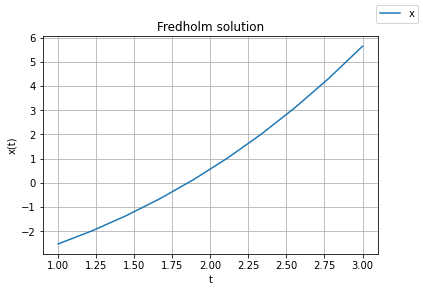

In [9]:
x, t = gauss_10(K=K, func=func) # для 10 узлов
draw(t, x)